# Tugas 1

Dissimilarity merupakan mencari jarak antara dua objek atau lebih dengan rentang 0 hingga 1.

Dissimilarity dapat diukur dengan menggunakan pengukuran jarak:
1. Euclidean Distance
2. Minkowski Distance

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset_url="https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/latest/owid-covid-latest.csv"
data=pd.read_csv(dataset_url, index_col=0)

In [ ]:
data

,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
iso_code,,,,,,,,,,,,,,,,,,,,,
AFG,Asia,Afghanistan,2022-09-20,197608.0,174.0,172.000,7796.0,0.0,0.714,4927.946,...,NaN,NaN,37.746,0.500,64.83,0.511,NaN,NaN,NaN,NaN
OWID_AFR,NaN,Africa,2022-09-20,12346974.0,617.0,710.571,256697.0,8.0,7.571,8867.441,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALB,Europe,Albania,2022-09-20,331715.0,114.0,74.857,3589.0,1.0,0.429,116199.194,...,7.100,51.200,NaN,2.890,78.57,0.795,NaN,NaN,NaN,NaN
DZA,Africa,Algeria,2022-09-20,270612.0,0.0,8.714,6879.0,0.0,0.000,6125.497,...,0.700,30.400,83.741,1.900,76.88,0.748,NaN,NaN,NaN,NaN
AND,Europe,Andorra,2022-09-20,46147.0,0.0,4.857,155.0,0.0,0.000,583887.947,...,29.000,37.800,NaN,NaN,83.73,0.868,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WLF,Oceania,Wallis and Futuna,2022-09-20,761.0,0.0,0.000,7.0,0.0,0.000,65451.105,...,NaN,NaN,NaN,NaN,79.94,NaN,NaN,NaN,NaN,NaN
OWID_WRL,NaN,World,2022-09-20,612856738.0,542216.0,476512.286,6529079.0,1707.0,1602.571,77485.633,...,6.434,34.635,60.130,2.705,72.58,0.737,NaN,NaN,NaN,NaN
YEM,Asia,Yemen,2022-09-20,11932.0,0.0,0.000,2155.0,0.0,0.000,361.777,...,7.600,29.200,49.542,0.700,66.12,0.470,NaN,NaN,NaN,NaN


In [ ]:
data[["continent", "location"]].head(4)

,continent,location
iso_code,,
AFG,Asia,Afghanistan
OWID_AFR,NaN,Africa
ALB,Europe,Albania
DZA,Africa,Algeria


In [ ]:
def diss(x,y):
  p = 2
  m = 0
  for row in["continent","location"]:
    if data[row][x]==data[row][y]:
      m+=1
    return (p-m)/p

In [ ]:
print(diss(1,1))
print(diss(1,2))
print(diss(1,3))

1.0
1.0
1.0


# Tugas 2

Diskritisasi : merubah tipe data numerik menjadi kategorikal.

- Mencari rentang nilai : nilai max dan nilai min
- Menjadikan beberapa rentang kategori (ex: A, B, C,..)
- w = Xmax-Xmin/K(kategori)
- Vi = Xmin + iw, i=1, ..., i=k-1

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset_url="https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
data=pd.read_csv(dataset_url)

In [ ]:
data[['sepal_length']]

,sepal_length
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
...,...
145,6.7
146,6.3
147,6.5
148,6.2


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')

In [ ]:
data['sepal_length']=est.fit_transform(data[['sepal_length']])

In [ ]:
data['sepal_length']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    1.0
Name: sepal_length, Length: 150, dtype: float64

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
data['sepal_width']=est.fit_transform(data[['sepal_width']])

In [ ]:
data['sepal_width']

0      2.0
1      1.0
2      2.0
3      1.0
4      2.0
      ... 
145    1.0
146    0.0
147    1.0
148    2.0
149    1.0
Name: sepal_width, Length: 150, dtype: float64

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
data['petal_length']=est.fit_transform(data[['petal_length']])

In [ ]:
data['petal_length']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: petal_length, Length: 150, dtype: float64

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
data['petal_width']=est.fit_transform(data[['petal_width']])

In [ ]:
data['petal_width']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    3.0
146    3.0
147    3.0
148    3.0
149    2.0
Name: petal_width, Length: 150, dtype: float64

# Tugas 3

Algoritma k-nearest neighbors (KNN) adalah metode klasifikasi data untuk memperkirakan kemungkinan bahwa titik data akan menjadi anggota dari satu kelompok atau kelompok yang lain berdasarkan kelompok mana titik data terdekat dengannya.

1. Mencari nilai K
2. Hitung jarak antara data uji dengan data latih
3. Mengurutkan jarak dari yang terkecil hingga terbesar
4. Mengambil data sebanyak K terdekat
5. Memilih kelas mayor

In [ ]:
import pandas as pd
import numpy as np
import math
import operator

In [ ]:
dataset_url="https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
data=pd.read_csv(dataset_url)

In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
def euclidianDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
       
    return np.sqrt(distance)
def knn(trainingSet, testInstance, k):
 
    distances = {}
    sort = {}
    length = testInstance.shape[1]
    print(length)
    
    
    # Calculating euclidean distance between each row of training data and test data
    for x in range(len(trainingSet)):
        
       
        dist = euclidianDistance(testInstance, trainingSet.iloc[x], length)
        distances[x] = dist[0]
       
 
    
    # Sorting them on the basis of distance
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1)) #by using it we store indices also
    sorted_d1 = sorted(distances.items())
    print(sorted_d[:5])
    print(sorted_d1[:5])
   
 
    neighbors = []
    
    
    # Extracting top k neighbors
    for x in range(k):
        neighbors.append(sorted_d[x][0])
    counts = {"Iris-setosa":0,"Iris-versicolor":0,"Iris-virginica":0}
    
    
    # Calculating the most freq class in the neighbors
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
 
        if response in counts:
            counts[response] += 1
        else:
            counts[response] = 1
  
    print(counts)
    sortedVotes = sorted(counts.items(), key=operator.itemgetter(1), reverse=True)
    print(sortedVotes)
    return(sortedVotes[0][0], neighbors)

In [ ]:
testSet = [[1.4, 3.6, 3.4, 1.2]]
test = pd.DataFrame(testSet)
result,neigh = knn(data, test, 4)
print("And the flower is:",result)
print("the neighbors are:",neigh)

4
[(57, 3.706750598570128), (8, 3.8065732621348567), (42, 3.817066936798463), (93, 3.8340579025361627), (38, 3.8431757701151272)]
[(0, 4.32434966208793), (1, 4.196427051671457), (2, 4.057092555020159), (3, 3.8858718455450894), (4, 4.237924020083418)]
{'Iris-setosa': 0, 'Iris-versicolor': 0, 'Iris-virginica': 0, 'versicolor': 2, 'setosa': 2}
[('versicolor', 2), ('setosa', 2), ('Iris-setosa', 0), ('Iris-versicolor', 0), ('Iris-virginica', 0)]
And the flower is: versicolor
the neighbors are: [57, 8, 42, 93]


In [ ]:
testSet = [[5.0, 3.3, 1.3, 0.2]]
test = pd.DataFrame(testSet)
result,neigh = knn(data, test, 15)
print("And the flower is:",result)
print("the neighbors are:",neigh)

4
[(49, 0.09999999999999987), (35, 0.1414213562373093), (7, 0.22360679774997896), (40, 0.2236067977499791), (39, 0.24494897427831766)]
[(0, 0.24494897427831777), (1, 0.3316624790355397), (2, 0.31622776601683766), (3, 0.48989794855663577), (4, 0.31622776601683816)]
{'Iris-setosa': 0, 'Iris-versicolor': 0, 'Iris-virginica': 0, 'setosa': 15}
[('setosa', 15), ('Iris-setosa', 0), ('Iris-versicolor', 0), ('Iris-virginica', 0)]
And the flower is: setosa
the neighbors are: [49, 35, 7, 40, 39, 0, 28, 17, 9, 34, 37, 2, 4, 1, 27]


# Tugas 4

Naive Bayes Classifier

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns

In [ ]:
flower = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
flower

'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [ ]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [ ]:
df = pd.read_csv(flower, names = headernames)
df

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X = df[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']]
y = df['Class']
X

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Class, Length: 150, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)

In [ ]:
gnb.score(X_test, y_test)

0.8333333333333334

In [ ]:
predict = gnb.predict([[1.3, 4.4, 5, 2.3]])
predict

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array(['Iris-virginica'], dtype='<U15')

# Tugas 5

**K-mean Clustering**

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

dataset_url="https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
data=pd.read_csv(dataset_url)
X = data.iloc[:, [1, 2, 3]].values

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans.labels_array([1, 1, 1, 0, 0, 0], dtype=int32)
kmeans.predict([[0, 0], [12, 3]])array([1, 0], dtype=int32)
kmeans.cluster_centers_array

In [8]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

In [9]:
iris = datasets.load_iris()

In [10]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [14]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
x=pd.DataFrame(iris.data)

In [12]:
x.columns=['Sepal_Length','Sepal_width','Petal_Length','Petal_width']

In [13]:
x

,Sepal_Length,Sepal_width,Petal_Length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
y=pd.DataFrame(iris.target)

In [16]:
y.columns=['Targets']

In [17]:
y

,Targets
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [18]:
model=KMeans(n_clusters=3)

In [19]:
model.fit(x)

KMeans(n_clusters=3)

In [20]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [21]:
predY = np.choose(model.labels_, [0,1,2])
print (model.labels_)
print (predY)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [24]:
colormap=np.array(['Red','green','blue'])

Text(0.5, 1.0, 'Classification K-means ')

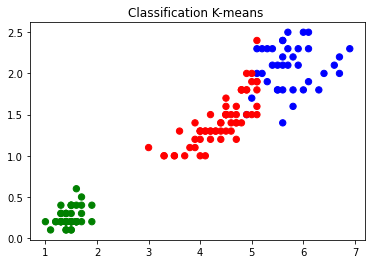

In [25]:
plt.scatter(x.Petal_Length, x.Petal_width,c=colormap[model.labels_],s=40)
plt.title('Classification K-means ')